## 2.1 Data Manipulation
### 2.1.1 Getting Started

In [47]:
import torch

**Tensor**: a (possibly multidimensional) array of numerical values. ---> one axis: *vector*, two axes: *matrix*  
**arange(n)**: create a vector of evenly spaced values. Default interval size is 1

In [48]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

**numel()**: # of the elements in a tensor

In [49]:
x.numel()

12

**shape**: tensor's shape. ---> length along each axis  
**reshape(h, w)**: can use (h, -1) or (-1, w) and rest will auto calculated

In [50]:
X = x.reshape(3, -1)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

For tensors with all 0s/1s: use **zeros()**/**ones()**

In [51]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Sample each element randomly and independently.  
Ex. initial parameters of neural networks.  
To create a tensor with elements drawn from a standard Gaussian normal distribution with mean=0 and standard deviation=1: **randn()**

In [52]:
torch.randn(3, 3)

tensor([[-0.5925, -0.5844, -0.3514],
        [-0.1024, -1.4752, -0.7621],
        [-0.8604,  0.1541,  0.2829]])

Can construct tensors from a list of lists. Outermost is axis 0, inner list is axis 1.

In [53]:
torch.tensor([[[1,1],[2,2]],[[3,3],[4,4]],[[5,5],[6,6]]])

tensor([[[1, 1],
         [2, 2]],

        [[3, 3],
         [4, 4]],

        [[5, 5],
         [6, 6]]])

### 2.1.2 Indexing and Slicing

Access tensor elements by indexing starting with 0.  

In [54]:
X, X[-1], X[1:3]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([ 8,  9, 10, 11]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

Write elements by specifying indices.

In [55]:
X[1, 2] = 15
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5, 15,  7],
        [ 8,  9, 10, 11]])

Assign multi elements the same value

In [56]:
X[:2, :] = 12
X

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

In [57]:
X[1:, :2] = 0
X

tensor([[12, 12, 12, 12],
        [ 0,  0, 12, 12],
        [ 0,  0, 10, 11]])

In [58]:
X[1:, 0] = -1
X

tensor([[12, 12, 12, 12],
        [-1,  0, 12, 12],
        [-1,  0, 10, 11]])

### 2.1.3 Operations

Elementwise operation:   
Unary scalar operators: map from one real number to the other.

In [59]:
torch.exp(x)

tensor([1.6275e+05, 1.6275e+05, 1.6275e+05, 1.6275e+05, 3.6788e-01, 1.0000e+00,
        1.6275e+05, 1.6275e+05, 3.6788e-01, 1.0000e+00, 2.2026e+04, 5.9874e+04])

Binary scalar operators: map pairs of real numbers to one.  
Common standard arithmetic operators: addition (+), subtraction (-), multiplication (*), division (/), and exponentiation (**) have all been lifted to elementwise operations for identically-shaped tensors of arbitrary shape.

In [60]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

Concatenate multi tensors to a larger one.

In [61]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X, Y, torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

Construct a binary tensor vai logical statements.

In [62]:
X==Y, X>Y

(tensor([[False,  True, False,  True],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

Sum all elements in the tensor.

In [63]:
X.sum()

tensor(66.)

### 2.1.4 Broadcasting

Perform elementwise binary operations by broadcasting: 
1. expand arrays to length=1, after this the two tensors have the same shape
2. perform elementwise operation on the result arrays

In [64]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b, a+b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

### 2.1.5 Saving Memory

**id()** gives the address of the object in memory.

In [65]:
before = id(Y)
Y = Y + X
id(Y) == before

False

Use X[:] to assign the new value to the array X. 

In [66]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2758479223424
id(Z): 2758479223424


Or use X[:] = ~~ or X+=~~~ to reduce memory.

In [67]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 Conversion to Other Python Objects

Convert to Numpy tensor (ndarray).

In [68]:
A = X.numpy()
B = torch.from_numpy(A)
# turn size=1 tensor to python scalar using item
a = torch.tensor([1.1])
type(A), type(B), a, a.item()

(numpy.ndarray, torch.Tensor, tensor([1.1000]), 1.100000023841858)

### 2.1.7 Summary
Tensor class provide: construction routines, indexing and slicing, mathematics operations, broadcasting, memory-efficient assignment, conversion to and from other Python objects.

## 2.2 Data Preprocessing
### 2.2.1 Reading the Dataset
Read comma-separated values (CSV) files

In [69]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

Import ***pandas*** and load the dataset.

In [70]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### 2.2.2 Data Preparation
***pandas*** will replace value NA or empty with NaN.   
These are **missing value** and are handled by **imputation**: replace missing values with estimates, or **deletion**: discards rows or columns contain missing values.  



In [71]:
# imputation
# iloc: select specific row & col --> select all row of col 0-2 as inputs, col 2 as target
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
# turn text category into 0/1 col
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [72]:
# imputation
# replace NaN with the mean of col
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


### 2.2.3 Conversion to the Tensor Format
Load numerical inputs and targets into a tensor

In [73]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

## 2.3 Linear Algebra
### 2.3.1 Scalars
**Scalars**: manipulate numbers one at a time. Denoted by lower-cased letters. Implemented by tensor with one element.

In [74]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors
**Vectors**: fixed-length array of scalars. Denoted by bold lowercase letters. Implemented by 1st-order tensors with arbitary lengths, access elements via indexing. The length of the vector is its **dimensionality**.

In [75]:
x = torch.arange(3)
x, x[2], len(x), x.shape

(tensor([0, 1, 2]), tensor(2), 3, torch.Size([3]))

### 2.3.3 Matrices
**Matrices**: 2nd-order tensors. Denoted by bold capital letters. aij: A's ith row and jth column.  
**Transpose**: exchange the matrix's rows and columns.  
**Symmetric**: square matrices that are equal to their transposes. A=AT

In [76]:
A = torch.arange(6).reshape(3,2)
A, A.T

(tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]))

### 2.3.4 Tensors
**Tensors**: nth-order arrays with arbitary numbers of axes. Denoted by capital letters with special font.

In [77]:
torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic Properties of Tensor Arithmetic
**Hadamard product**: element wise product of two matrices.

In [78]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B,A * B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]),
 tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]))

### 2.3.5 Reduction
Sum of the elements in a vector x of length n: **x.sum()**, reduce the tensor and produce a scalar.  
Can specify the axes along which the tensor should be reduced.

In [79]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum(), A, A.sum(), A.sum(axis=0), A.sum(axis=1), A.sum(axis=[0,1]) == A.sum()

(tensor([0., 1., 2.]),
 tensor(3.),
 tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor(15.),
 tensor([3., 5., 7.]),
 tensor([ 3., 12.]),
 tensor(True))

Related quantity: **x.mean(), x.sum()/x.numel()**

In [80]:
A.mean() == A.sum()/A.numel()

tensor(True)

### 2.3.7 Non-Reduction Sum
Keep the number of axes unchanged when invoking the function for calculationg the sum or mean.  
Then can use broadcasting.

In [81]:
sum_A = A.sum(axis=1, keepdims=True)
A,  A.sum(axis=1), sum_A

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([ 3., 12.]),
 tensor([[ 3.],
         [12.]]))

In [82]:
# use broadcasting to create a matrix with each row sum=1
A/sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

Calculate the cumulative sum of elements along axis: **x.cumsum(axis=..)**


In [83]:
A, A.cumsum(axis=0)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0., 1., 2.],
         [3., 5., 7.]]))

### 2.3.8 Dot Products
**Dot product**: sum over the products of the elements at the same position: $\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$  
Useful in: weighted sum of x accroding to the weights w can be expressed as $\mathbf{x}^\top \mathbf{w}$--> **weighted average**. After normalize x and w to have unit length, it express the cosine of the angle between x and w..

In [84]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y), torch.sum(x*y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.), tensor(3.))

### 2.3.9 Matrix-Vector Products
**Product** between m*n matrix A and n-dimensional vector x: **torch.mv(A, x)**, #col of A (length of A along axis=1) == dimension of x (length of x), or write **A@x**

In [85]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### 2.3.10 Matrix-Matrix Multiplication
**Multiplication** between n\*k matrix A and  k\*m matrix B: **torch.mm(A, B)**, or write **A@B**  
AB =  m matrix-vector products or m\*n dot products, then stitch the results to form an n\*m matrix.

In [86]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### 2.3.11 Norms
The **norm** of a vector shows how big it is. It is a function || * || maps a vector to a scalar and satisfies the following 3: 
1. Scale vector x by scaler a, the norm scales accordingly: ||ax||=|a||x||  
2. Norms satisfy the triangle inequality: ||x+y|| <= ||x||+||y||
3. ||x|| > 0 for all x!= 0  

$\ell_2$ norm: Euclidean length of a vector. $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^{n} x_i^2}$. Use **torch.norm(x)** to calculate it.

In [87]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)


tensor(5.)

$\ell_1$ norm: Manhattan distance. $\|\mathbf{x}\|_1 = \sum_{i=1}^{n} |{x_i}|$. Use **torch.abs(x).sum()** to calculate it.

In [88]:
torch.abs(u).sum()

tensor(7.)

$\ell_p$ norms: $\|\mathbf{x}\|_p = \left(\sum_{i=1}^{n} |x_i|^p \right)^{1/p}$

For matrices: **spectral norm**  
Frobenius norm: $\ell_2$ norm of a matrix-shaped vector. $\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n} x_{ij}^2}$. Use **torch.norm(X)** to calculate it.  
Optimization problems in deep learning: *maximize* the probability or *minimize* the distance. Those are ofthen expressed as norms.

In [89]:
torch.norm(torch.ones((4,9))), torch.norm(A)

(tensor(6.), tensor(7.4162))

### 2.3.12 Discussion
- Scalars, vectors, matrices, tensors are the basic mathematical objects used in linear algebra and have 0, 1, 2, and an arbitary number of axes.
- Slice/reduce tensors along specified axes vai indexing. 
- *Hadamard products*: elementwise products. *Dot products, matrix-vector products, matrix-matrix products* are not elementwise operations and return objects shape diff from the operands.
- Norms often used to measure the distance between two vectors. Common vector norms: $\ell_1$, $\ell_2$. Common matrix norms: *spectral* norms, *Frobenius* norms.

## 2.4 Calculus
**Differential calculus** and **integral calculus** are used in optimization problems when update parameters to decrease loss.  
**Generalization**: perform well on previous unseen data.  
### 2.4.1 Derivatives and Differentiation
**Derivative**: rate of change in a function with respect to changes in its arguments. How rapidly a loss function would increase/decrease. $f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$  
Not all functions are differentiable: accuracy, area under the receiving operationg characteristic AUC ---> optimize a differentiable **surrogate**.  
Derivative $f'(x)$ is the instantaneous rate of change of $f(x)$ with respect to $x$

In [90]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l
def f(x):
    return 3 * x ** 2 - 4 * x
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


### 2.4.2 Visualization Utilities
Use **matplotlib** library to visualize the slopes of functions. 

In [91]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

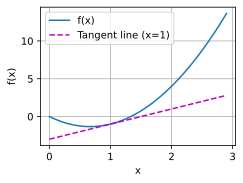

In [92]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 2.4.3 Partial Derivatives and Gradients
**Partial derivative** of $y = f(x_1, x_2, ..., x_n)$ with respect to the $i^{th}$ parameter $x_i$ is: 
$$
\frac{\partial y}{\partial x_i}
=
\lim_{h \to 0}
\frac{
f(x_1, \ldots, x_{i-1}, x_i + h, x_{i+1}, \ldots, x_n)
-
f(x_1, \ldots, x_i, \ldots, x_n)
}{h}
$$  
Concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector: **gradient** of the function. The gradient of the function $f$ with respect to $\mathbf{x}$ is a vector of $n$ partial derivatives.
$$
\nabla_{\mathbf{x}} f(\mathbf{x})
=
\left[
\partial_{x_1} f(\mathbf{x}),
\partial_{x_2} f(\mathbf{x}),
\ldots,
\partial_{x_n} f(\mathbf{x})
\right]^{\top}
$$  
Rules: 
- For all $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have: $\nabla_{\mathbf{x}} \mathbf{Ax} = \mathbf{A}^{\top}$ and $\nabla_{\mathbf{x}} \mathbf{x}^{\top} \mathbf{A} = \mathbf{A}$  
- For square matrices $\mathbf{A} \in \mathbb{R}^{m \times n}$ we have: $\nabla_{\mathbf{x}} \mathbf{x}^{\top}\mathbf{Ax}=(\mathbf{A}+\mathbf{A}^{\top})\mathbf{x}$ and in particular $\nabla_{\mathbf{x}}\|\mathbf{x}\|^2 = \nabla_{\mathbf{x}}\mathbf{x}^{\top}\mathbf{x} = 2\mathbf{x}$  

### 2.4.4 Chain Rule
For deeply nested functions, use **chain rule** to calculate gradients: $\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}$  
For $y=f{\mathbf{u}}$ with variables $u_1, u_2, ...u_m, u_i = g_i(\mathbf{x}), i.e.\mathbf{u}=g(\mathbf{x})$, from chain rule: 
$$
\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + ... + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}, \nabla_{\mathbf{x}}y=\mathbf{A}\nabla_{\mathbf{u}}y
$$  
$\mathbf{A} \in \mathbb{R}^{m \times n}$ is a matrix that contains the derivative of vector $\mathbf{u}$ with respect to vector $\mathbf{x}$, which is a vector-matrix product

## 2.5 Automatic Differentiation
**Automatic differentiation / autograd**: deep learning framwork builds a **computational graph** that tracks how each value depends on others. To calculate derivatives, automatic differentiation works backwards through this graph applying the chain rule. The computational algorithm for applying the chain rule in this fashion is called **backpropagation**.
### 2.5.1 A Simple Function
Differentiating $y=2\mathbf{x}^{\top}\mathbf{x}$

In [95]:
x = torch.arange(4.0)
# avoid allocating new memory when taking a derivative.
x.requires_grad_(True)
y = 2 * torch.dot(x, x)
# take the gradient of y with respect to x by backward()
y.backward()
print(x, '\n', y, '\n', x.grad, x.grad == 4*x)


tensor([0., 1., 2., 3.], requires_grad=True) 
 tensor(28., grad_fn=<MulBackward0>) 
 tensor([ 0.,  4.,  8., 12.]) tensor([True, True, True, True])


In [96]:
# calculate another function of x and its gradient
# first reset the gradient buffer
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2 Backward for Non-Scalar Variables
**Jacobian**: a matrix contains the partial derivatives of each component of y with respect to each component of x. Higher-order y and x have even higher-order tensor.  
We want: sum up the gradients of each component of y with respect to the full vector x, yield a vector with the same shape as x. Ex. sum up grad for each example in a batch

In [100]:
# convert function to scalar and comput the vector's gradient. 
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))
# or: y.sum().backward()  is faster
print(x.grad, '\n',y)

tensor([0., 2., 4., 6.]) 
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


### 2.5.3 Detaching Computation
To **detach** the respective computational graph from the final result.   
For x --> y --> z, we want the direct influence of x on z.  
So create u, it take the same value as y, with no provenance (y from x, u from nothing): x --> y. u --> z

In [104]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x

# result of x->y->z, also == x->z
z.sum().backward()
print(x.grad == u)

# result of x->y
x.grad.zero_()
y.sum().backward()
print(x.grad == 2*x)


tensor([True, True, True, True])
tensor([True, True, True, True])


### 2.5.4 Gradients and Python Control Flow
Calculate gradient with python conditions/loops/function calls.

In [105]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

# set requires_grad=true for tensors can be changed using gradient descent
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
# no matter what f is, it is a linear func and satisfy:
a.grad == d/a

tensor(True)

### 2.5.5 Discussion
- attach grad to what we desire derivatives: set **requires_grad=True** on wanted grad leaf tensors.
- record the computation of the target value: z = y.sum() for a scalar value (the target).
- execute the backpropagation function: z**.backward()** on the scalar output.
- access the res gradient: can be accessed in the leaf tensor by: x**.grad**
- **Notice:** 
  - .backward() adds to exist grads --> use **.zero_()**
  - free graph after backward. --> reuse use **retain_graph=True**
  - higher-order derivatives are expensive
  - .backward() assumes a scalar output
  - .detach() redefines the function being optimized
  - backward is efficient for scalar losses and many parameters. forward is better for few inputs and many outputs.

## 2.6 Probability and Statistics
**Probability** is the mathematical field concerned with reasoning under uncertainty.
### 2.6.1 A Simple Example: Tossing Coins
Probabilities assign scores between and to outcomes of interest, called **events**.   
**Probabilities** are theoretical quantities that underly the data generating process.  
**Statistics** are empirical quantities that are computed as functions of the observed data.   
Special statistics called **estimators**: given a dataset, produce estimates of model parameters such as probabilities.  
**Consistency**: when those estimators satisfy a nice property.  
For coin example: P(heads) = 0.5. To simulate: random number generator in python: **random** yields numbers in [0,1]

In [113]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

# use Multinomial to do sampling
fair_probs = torch.tensor([0.5, 0.5])
print('use multinomial for 100 times:',Multinomial(100, fair_probs).sample()/100)

# a larger example
counts = Multinomial(10000, fair_probs).sample()
print('use multinomial for 1000 times:',counts / 10000)

heads, tails:  [48, 52]
use multinomial for 100 times: tensor([0.4500, 0.5500])
use multinomial for 1000 times: tensor([0.4941, 0.5059])


**Law of large numbers** and **central limit theorem**:  in many situations, as the sample size $n$ grows, these errors should go down at a rate of $(1/\sqrt n)$


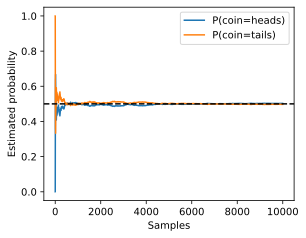

In [114]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### 2.6.2. A More Formal Treatment
probability theory, proposed by Kolmogorov  
### 2.6.3. Random Variables
discrete random variables and continuous ones
### 2.6.4. Multiple Random Variables
conditional probability, Bayes’ theorem, marginalize over random variables
### 2.6.6. Expectations
## 2.7 Documentation
### 2.7.1. Functions and Classes in a Module
use **dir**: dir(torch.distributions) --> all properties in module for generating randm num
### 2.7.2. Specific Functions and Classes
use **help** for how to use a given func --> help(torch.ones)
in jupyter notebook, use **?** to display the doc in another window.